In [1]:
import anndata
import scanpy as sc
from pandas import read_csv

In [2]:
filters = read_csv('../samplesheet_scrnaseq_preprocessing.csv')

dataset_str = 'Travaglini_Krasnow_2020_Lung_10x'

id_row = filters[filters.id == dataset_str]
file_str = id_row.input_adata.iloc[0].split('/')[-1]

In [32]:
filters

id  \
0                    Adams_Kaminski_2020_COPD   
1                       Chen_Zhang_2020_NSCLC   
2                 Goveia_Carmeliet_2020_NSCLC   
3                        Guo_Zhang_2018_NSCLC   
4   Habermann_Kropski_2020_pulmonary-fibrosis   
5                           Kim_Lee_2020_LUAD   
6                            He_Fan_2021_LUAD   
7                 Lambrechts_2018_LUAD_6149v1   
8                 Lambrechts_2018_LUAD_6149v2   
9                   Lambrechts_2018_LUAD_6653   
10               Laughney_Massague_2020_NSCLC   
11    Madissoon_Meyer_2020_pulmonary-fibrosis   
12                     Maier_Merad_2020_NSCLC   
13                  Maynard_Bivona_2020_NSCLC   
14      Mayr_Schiller_2020_pulmonary-fibrosis   
15   Reyfman_Misharin_2018_pulmonary-fibrosis   
16           Travaglini_Krasnow_2020_Lung_10x   
17           Travaglini_Krasnow_2020_Lung_SS2   
18                                     UKIM-V   
19               Vieira_Teichmann_2019_asthma   
20                         Wu_Zhou_2021_NSCLC   
21                  Zilionis_Klein_2019_NSCLC   

                                          input_adata  min_counts  max_counts  \
0   data/12_input_adatas/adams_kaminski_2020_copd....        1000       35000   
1     data/12_input_adatas/Chen_Zhang_2020_NSCLC.h5ad         600       30000   
2   data/12_input_adatas/goveia_carmeliet_2020_nsc...         600       30000   
3      data/12_input_adatas/guo_zhang_2018_nsclc.h5ad       20000     3000000   
4   data/12_input_adatas/Habermann_Kropski_2020_pu...         600       30000   
5         data/12_input_adatas/Kim_Lee_2020_LUAD.h5ad        1000       35000   
6          data/12_input_adatas/He_Fan_2021_LUAD.h5ad         600       30000   
7   data/12_input_adatas/lambrechts_2018_luad_6149...         600       30000   
8   data/12_input_adatas/lambrechts_2018_luad_6149...         600       30000   
9   data/12_input_adatas/lambrechts_2018_luad_6653...        1200       40000   
10  data/12_input_adatas/laughney_massague_2020_ns...        1800       40000   
11  data/12_input_adatas/madissoon19_lung.processe...         600       30000   
12   data/12_input_adatas/maier_merad_2020_nsclc.h5ad        1000       30000   
13              data/12_input_adatas/maynard2020.h5ad       20000    20000000   
14  data/12_input_adatas/munich_cohort_human_datas...         600       30000   
15  data/12_input_adatas/Reyfman_Misharin_2018_pul...        1000       30000   
16  data/12_input_adatas/Travaglini_Krasnow_2020_L...        1000       30000   
17  data/12_input_adatas/Travaglini_Krasnow_2020_L...       20000     6000000   
18         data/12_input_adatas/batch1_3patients.h5ad        2000      100000   
19  data/12_input_adatas/Vieira_Teichmann_2019_ast...         600       30000   
20       data/12_input_adatas/wu_zhou_2021_nsclc.h5ad         600       30000   
21  data/12_input_adatas/zilionis_klein_2019_nsclc...         600       30000   

    min_genes  max_genes  max_pct_mito batch_key  run_solo  no_cancer  \
0         500      10000            20    sample      True       True   
1         250      10000            20    sample      True      False   
2         250      10000            20    sample      True      False   
3        1000      20000            20    sample     False       True   
4         200      10000            20    sample      True       True   
5         300      10000            20    sample      True      False   
6         250      10000            20    sample      True      False   
7         200      10000            15    sample      True      False   
8         250      10000            20    sample      True      False   
9         250      10000            20    sample      True      False   
10        500      10000            20    sample      True      False   
11        300      10000            20    sample      True       True   
12        400      10000            15    sample     False       True   
13        600      20000     

In [35]:
thresholds = {}
thresholds['min_counts']  = int(id_row.min_counts)
thresholds['max_counts'] = int(id_row.max_counts)
thresholds['min_genes'] = int(id_row.min_genes)
thresholds['max_genes'] = int(id_row.max_genes)
thresholds['max_pct_mito'] = int(id_row.max_pct_mito)

adata = anndata.read_h5ad(f'/root/datos/maestria/netopaas/luca/data/12_input_adatas/{file_str}')

/tmp/ipykernel_2834/1983533706.py:2: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  thresholds['min_counts']  = int(id_row.min_counts)
/tmp/ipykernel_2834/1983533706.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  thresholds['max_counts'] = int(id_row.max_counts)
/tmp/ipykernel_2834/1983533706.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  thresholds['min_genes'] = int(id_row.min_genes)
/tmp/ipykernel_2834/1983533706.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  thresholds['max_genes'] = int(id_row.max_genes)
/tmp/ipykernel_2834/1983533706.py:6: FutureWarning: Calling int on a single element Series 

In [7]:
adata.obs

tissue  region      sample  location patient  \
index                                                                
P2_1_AAACCTGAGAAACCAT   lung  normal    distal 2    distal      P2   
P2_1_AAATGCCAGATGAGAG   lung  normal    distal 2    distal      P2   
P2_1_AACACGTTCGATCCCT   lung  normal    distal 2    distal      P2   
P2_1_AACACGTTCGCACTCT   lung  normal    distal 2    distal      P2   
P2_1_AACCATGCAGCTCGCA   lung  normal    distal 2    distal      P2   
...                      ...     ...         ...       ...     ...   
P3_6_TGTCCCAGTTCTGAAC   lung  normal    distal 3    distal      P3   
P3_6_TTCTCCTTCTGTTTGT   lung  normal    distal 3    distal      P3   
P3_7_AACTCCCCACTACAGT   lung  normal    distal 3    distal      P3   
P3_7_TCGTAGATCATCGGAT   lung  normal    distal 3    distal      P3   
P3_4_GCTGCGAAGAGCTTCT   lung  normal  proximal 3  proximal      P3   

                                origin condition     sex  age  \
index                                                           
P2_1_AAACCTGAGAAACCAT  normal_adjacent     NSCLC    male   46   
P2_1_AAATGCCAGATGAGAG  normal_adjacent     NSCLC    male   46   
P2_1_AACACGTTCGATCCCT  normal_adjacent     NSCLC    male   46   
P2_1_AACACGTTCGCACTCT  normal_adjacent     NSCLC    male   46   
P2_1_AACCATGCAGCTCGCA  normal_adjacent     NSCLC    male   46   
...                                ...       ...     ...  ...   
P3_6_TGTCCCAGTTCTGAAC  normal_adjacent     NSCLC  female   51   
P3_6_TTCTCCTTCTGTTTGT  normal_adjacent     NSCLC  female   51   
P3_7_AACTCCCCACTACAGT  normal_adjacent     NSCLC  female   51   
P3_7_TCGTAGATCATCGGAT  normal_adjacent     NSCLC  female   51   
P3_4_GCTGCGAAGAGCTTCT  normal_adjacent     NSCLC  female   51   

                                                dataset  
index                                                    
P2_1_AAACCTGAGAAACCAT  Travaglini_Krasnow_2020_Lung_10x  
P2_1_AAATGCCAGATGAGAG  Travaglini_Krasnow_2020_Lung_10x  
P2_1_AACACGTTCGATCCCT  Travaglini_Krasnow_2020_Lung_10x  
P2_1_AACACGTTCGCACTCT  Travaglini_Krasnow_2020_Lung_10x  
P2_1_AACCATGCAGCTCGCA  Travaglini_Krasnow_2020_Lung_10x  
...                                                 ...  
P3_6_TGTCCCAGTTCTGAAC  Travaglini_Krasnow_2020_Lung_10x  
P3_6_TTCTCCTTCTGTTTGT  Travaglini_Krasnow_2020_Lung_10x  
P3_7_AACTCCCCACTACAGT  Travaglini_Krasnow_2020_Lung_10x  
P3_7_TCGTAGATCATCGGAT  Travaglini_Krasnow_2020_Lung_10x  
P3_4_GCTGCGAAGAGCTTCT  Travaglini_Krasnow_2020_Lung_10x  

[65662 rows x 10 columns]

Aunque sean de pulmones con cancer se tomo cuidado de que estuvieron muy lejos del tumor y que se parecieran a tejido sano

In [37]:
adata.var

Empty DataFrame
Columns: []
Index: [DDX11L1, WASH7P, MIR6859-3, MIR6859-2, MIR6859-1, MIR6859-4, MIR1302-2, MIR1302-11, MIR1302-9, MIR1302-10, FAM138A, FAM138C, FAM138F, OR4F5, LOC729737, FAM138D, OR4F29, OR4F3, OR4F16, LOC100132287, LOC100132062, LOC101928626, MIR6723, LOC100133331, LOC100288069, FAM87B, LINC00115, LINC01128, FAM41C, LOC100130417, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, HES4, ISG15, AGRN, RNF223, C1orf159, LINC01342, MIR200B, MIR200A, MIR429, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, FAM132A, UBE2J2, SCNN1D, ACAP3, MIR6726, PUSL1, CPSF3L, MIR6727, CPTP, TAS1R3, DVL1, MIR6808, MXRA8, AURKAIP1, CCNL2, LOC148413, MRPL20, ANKRD65, TMEM88B, LOC102724312, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, C1orf233, MIB2, MMP23B, MMP23A, CDK11B, SLC35E2B, CDK11A, SLC35E2, NADK, GNB1, CALML6, TMEM52, CFAP74, GABRD, PRKCZ, FAAP20, SKI, MORN1, LOC100129534, RER1, PEX10, PLCH2, PANK4, HES5, LOC115110, ...]

[26485 rows x 0 columns]

In [40]:
# very basic gene filtering - genes with 0 cells cause some downstream processes to fail.
print("Filtering genes")
print(f"    Before: {adata.shape[1]}")
sc.pp.filter_genes(adata, min_counts=3)
print(f"    After: {adata.shape[1]}")

# %%
# Apply thresholds
print("Filter by min_counts")
print(f"    Before: {adata.shape[0]}")
sc.pp.filter_cells(adata, min_counts=thresholds["min_counts"])
print(f"    After: {adata.shape[0]}")


print("Filter by max_counts")
print(f"    Before: {adata.shape[0]}")
sc.pp.filter_cells(adata, max_counts=thresholds["max_counts"])
print(f"    After: {adata.shape[0]}")


print("Filter by min_genes")
print(f"    Before: {adata.shape[0]}")
sc.pp.filter_cells(adata, min_genes=thresholds["min_genes"])
print(f"    After: {adata.shape[0]}")


print("Filter by max_genes")
print(f"    Before: {adata.shape[0]}")
sc.pp.filter_cells(adata, max_genes=thresholds["max_genes"])
print(f"    After: {adata.shape[0]}")

# %% We have no mito genes so skip this part
# if "mito" not in adata.var.columns:
#     adata.var["mito"] = adata.var_names.str.lower().str.startswith("mt-")

# # %%
# sc.pp.calculate_qc_metrics(
#     adata, qc_vars=("mito",), log1p=False, inplace=True, percent_top=None
# )

# print("Filter by max_pct_mito")
# print(f"    Before: {adata.shape[0]}")
# adata = adata[adata.obs["pct_counts_mito"] < thresholds["max_pct_mito"]].copy()
# print(f"    After: {adata.shape[0]}")

Filtering genes
    Before: 26485
    After: 20926
Filter by min_counts
    Before: 65662
    After: 65662
Filter by max_counts
    Before: 65662
    After: 63252
Filter by min_genes
    Before: 63252
    After: 63252
Filter by max_genes
    Before: 63252
    After: 63252


## 3.1.1 Automated annotation

For a more detailed walkthrough of the process go to `../HCA-Lung/AutoLung.ipynb` or even https://docs.scarches.org/en/latest/hlca_map_classify.html

IT IS IMPORTANT THAT THE QUERY DATA IS IN RAW COUNTS, WE CHECK THAT HERE:


In [41]:
adata.X[:10, :30].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        2., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        3., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        3., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [42]:
import pandas as pd
import anndata as ad
import numpy as np

import scarches as sca
import gdown
import gzip
import shutil
from scipy import sparse

sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

import sys, os
sys.path.append(os.path.join(os.getcwd(), '../../single-cell-tutorial/download_scripts'))
from functions import remove_repeated_var_inds, join_map_mart

### Load Query dataset

In [43]:
batch_key = 'dataset'
name = dataset_str.split('_')[0]
query_batch = [f'lung_{name}']
cell_type_key = 'scanvi_label'
data_dir = '/root/datos/maestria/netopaas/lung_scRNA'
backup_dir = '/root/datos/maestria/netopaas/luca_explore'
ref_model_path = f'{data_dir}/HCA_Lung/HLCA_reference_model'

#Important to check how many epochs would be ideal
surgery_epochs = 100
early_stopping_kwargs_surgery = {
    "early_stopping_monitor": "elbo_train",
    "early_stopping_patience": 10,
    "early_stopping_min_delta": 0.001,
    "plan_kwargs": {"weight_decay": 0.0},
}

In [44]:
adata_ref = sc.read_h5ad(f'{data_dir}/HCA_Lung/HLCA_emb_and_metadata.h5ad')

In [45]:
adata_query_unprep = adata.copy()

# We need RAW count data for the model we are using so we get it from adata.layers
#adata_query_unprep.X = adata_query_unprep.layers['counts']

For faster computation convert the matrix to sparse.
First check with `adata.X` if it is sparse

In [46]:
adata.X
# adata_query_unprep.X = sparse.csr_matrix(adata_query_unprep.X)

<63252x20926 sparse matrix of type '<class 'numpy.float32'>'
	with 114710862 stored elements in Compressed Sparse Row format>

### Change to Ensembl IDs

Revert to ensemble ids using the assembly reference gch38 (or hg19 in the comments) used in the experiment.
Doing this via THE PACKAGE Biomart always leaves us with some gaps because there are many manually annotated genes.

**WARNING**
Lost only 5% of genes with this method

Chen uses:
- Chemistry 10x 3' v2
- CellRanger 3.2.0 for fastq generation
- STAR with GRCh38

I have sent an email to ask for the assembly used in STAR.
Other ideas to figure this out : 
- Figuring in what assembly some of the lost genes are
- Check the SAM/BAM Header

If your query feature naming does not match your reference model feature naming, you will need to add the right feature names. For the HLCA reference, the mapping of the 2000 input gene IDs to their gene names is stored on the HLCA Zenodo page, so you can add gene ids using that mapping. Alternatively, you can map your gene IDs to gene names (or the reverse) using BioMart mapping tables. In most cases your raw data includes both gene IDs and names, in which case mapping is not necessary.

Let’s download the HLCA-specific gene mapping:

In [47]:
path_gene_mapping_df = f'{data_dir}/HCA_Lung/HLCA_reference_model_gene_order_ids_and_symbols.csv'

In [48]:
# Download gene information from HLCA github:
# url = "https://zenodo.org/record/7599104/files/HLCA_reference_model_gene_order_ids_and_symbols.csv"
# gdown.download(url, path_gene_mapping_df, quiet=False)

In [49]:
gene_id_to_gene_name_df = pd.read_csv(path_gene_mapping_df, index_col=0)

# Store your gene names in an adata.var.column if they are currently the index:
# if gene names are in .var.index:
adata_query_unprep.var["gene_names"] = adata_query_unprep.var.index
gene_name_column_name = "gene_names"

Map gene names to gene ids for all of the 2000 reference model genes that we can find in our data:

Check number of detected genes:

In [50]:
n_overlap = (
    adata_query_unprep.var[gene_name_column_name]
    .isin(gene_id_to_gene_name_df.gene_symbol)
    .sum()
)
n_genes_model = gene_id_to_gene_name_df.shape[0]
print(
    f"Number of model input genes detected: {n_overlap} out of {n_genes_model} ({round(n_overlap/n_genes_model*100)}%)"
)



Number of model input genes detected: 1824 out of 2000 (91%)


Subset query data to only the genes that are part of the modeling input, then map gene names to gene ids using the table above. Store the resulting ids both in the .var.index (for scArches) and in a .var[gene_ids] (for merging duplicate genes).

In [51]:
adata_query_unprep = adata_query_unprep[
    :,
    adata_query_unprep.var[gene_name_column_name].isin(
        gene_id_to_gene_name_df.gene_symbol
    ),
].copy()  # subset your data to genes used in the reference model
adata_query_unprep.var.index = adata_query_unprep.var[gene_name_column_name].map(
    dict(zip(gene_id_to_gene_name_df.gene_symbol, gene_id_to_gene_name_df.index))
)  # add gene ids for the gene names, and store in .var.index
# remove index name to prevent bugs later on
adata_query_unprep.var.index.name = None
adata_query_unprep.var["gene_ids"] = adata_query_unprep.var.index


In [52]:
adata_query_unprep.var.head(3)

n_counts gene_names         gene_ids
ENSG00000188290   20107.0       HES4  ENSG00000188290
ENSG00000187608  117346.0      ISG15  ENSG00000187608
ENSG00000162571    1795.0     TTLL10  ENSG00000162571

In [53]:
def sum_by(adata: ad.AnnData, col: str) -> ad.AnnData:
    adata.obs[col] = adata.obs[col].astype('category')
    assert pd.api.types.is_categorical_dtype(adata.obs[col])

    cat = adata.obs[col].values
    indicator = sparse.coo_matrix(
        (np.broadcast_to(True, adata.n_obs), (cat.codes, np.arange(adata.n_obs))),
        shape=(len(cat.categories), adata.n_obs),
    )

    return ad.AnnData(
        indicator @ adata.X, var=adata.var, obs=pd.DataFrame(index=cat.categories)
    )

shape before merging:

Now merge. Note that all var columns will be dropped after merging (as we don’t specify how to merge). As the merging is done based on .obs indices in the function above, we transpose our anndata object and re-transpose it after merging.

In [54]:
adata_query_unprep = sum_by(adata_query_unprep.transpose(), col="gene_ids").transpose()

In [55]:
adata_query_unprep.shape

(63252, 1824)

add back gene ids:

In [56]:
adata_query_unprep.var = adata_query_unprep.var.join(gene_id_to_gene_name_df).rename(columns={"gene_symbol":"gene_names"})

### Surgery

We pad missing query genes with zeros and reorder the available ones to ensure data corectness and smooth running of the scArches reference mapping.

In [57]:
adata_query = sca.models.SCANVI.prepare_query_anndata(
    adata = adata_query_unprep,
    # return_reference_var_names=True,
    reference_model = ref_model_path,
    inplace=False)

INFO     File /root/datos/maestria/netopaas/lung_scRNA/HCA_Lung/HLCA_reference_model/model.pt already downloaded   
INFO     Found 91.2% reference vars in query data.                                                                 


This line should be kept unchanged due to the structure of the pre-trained reference model.

In [58]:
adata_query.obs['scanvi_label'] = 'unlabeled'

Now we perform scArches “surgery”.

Note: if you use gene names rather than ensembl IDs in your query_data.var.index, you will get a warning that your genes (var_names) do not match the training genes. You can ignore this warning, as long as you have done the gene check in the beginning of the notebook.

In [59]:
from scvi.model.base._utils import _load_saved_files
attr_dict, var_names, model_state_dict, adata_ = _load_saved_files(ref_model_path, load_adata=False, map_location='cpu')

INFO     File /root/datos/maestria/netopaas/lung_scRNA/HCA_Lung/HLCA_reference_model/model.pt already downloaded   


Thanks to exploring the model we can deduce what .obs we need and the name we assigned. In this case we need to define a 'dataset'
column in obs to define the batches. Seeing as to how every sample ia new day in the experiment we define the batches as the samples.

We can load the model with this command or train it if we havent got it

In [60]:
adata_query.obs['dataset'] = adata_query.obs['sample']
# adata_query.obs['sample'] = adata_query.obs['sample'].astype('string')
# adata_query.obs['dataset'] = adata_query.obs['dataset'].astype('string')

In [61]:
for col in adata_query.obs.columns:
    if pd.api.types.is_categorical_dtype(adata_query.obs[col]):
        adata_query.obs[col] = adata_query.obs[col].astype('str')


In [62]:
# Convert all mito falgs into false because we are using the latent genes of the HCA_lung model
# adata_query = sc.read_h5ad(f'{backup_dir}/surgeries/query_{name}.h5ad')
adata_query.var.mito = False
adata_query.write_h5ad(f'{backup_dir}/surgeries/query_{name}.h5ad')

Apparently we have to aks for cuda availability explicitly for scArches to recognize that we have GPU

In [63]:
import torch
torch.cuda.is_available()

True

In [64]:
surgery_model = sca.models.SCANVI.load_query_data(
        adata_query,
        ref_model_path,
        freeze_dropout = True,
    )

INFO     File /root/datos/maestria/netopaas/lung_scRNA/HCA_Lung/HLCA_reference_model/model.pt already downloaded   


In [65]:
%%time
surgery_model.train(
     max_epochs=surgery_epochs,
    **early_stopping_kwargs_surgery
)

INFO     Training for 100 epochs.                                                                                  


INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [18:12<00:00, 12.00s/it, v_num=1, train_loss_step=632, train_loss_epoch=621]

INFO: `Trainer.fit` stopped: `max_epochs=100` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [18:12<00:00, 10.92s/it, v_num=1, train_loss_step=632, train_loss_epoch=621]
CPU times: user 21min 52s, sys: 3.53 s, total: 21min 55s
Wall time: 18min 12s


In [66]:
surgery_model.save(f'{backup_dir}/surgeries/{name}', overwrite=True)
# surgery_model = sca.models.SCANVI.load(f'{backup_dir}/surgeries/{name}/', adata_query)

### Get latent representation
Here we will calculate the “latent representation”, or “low-dimensional embedding” of your dataset. This embedding is in the same space as the HLCA core/reference embedding that you loaded in the beginning of the script. Hence, we can combine the two embeddings afterwards (HLCA + your new data), and do joint clustering, UMAP embedding, label transfer etc.!

In [67]:
adata_query_latent = sc.AnnData(surgery_model.get_latent_representation(adata_query))
adata_query_latent.obs = adata_query.obs.loc[adata_query.obs.index,:]

In [68]:
adata_query_latent.write_h5ad(f'{backup_dir}/surgeries/latent_{name}.h5ad')
# adata_query_latent = sc.read_h5ad(f'{backup_dir}/surgeries/latent_{name}.h5ad')

### Combine embeddings
We add “reference or query” metadata to acquire more information and better analyse the integration level.

In [69]:
adata_query_latent.obs['ref_or_query'] = "query"
adata_ref.obs['ref_or_query'] = "ref"

We will now combine the two embeddings to enable joing clustering etc. If you expect non-unique barcodes (.obs index), set index_unique to e.g. “_” and batch_key to the obs column that you want to use as barcode suffix (e.g. “dataset”).

In [70]:
combined_emb = adata_ref.concatenate(adata_query_latent, index_unique=None) # index_unique="_", batch_key="dataset") # alternative

/usr/local/lib/python3.11/site-packages/anndata/_core/anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/usr/local/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.11/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [71]:
# We save the combined embeddings (optional).
combined_emb.write_h5ad(f'{backup_dir}/surgeries/combined_{name}.h5ad')
# combined_emb = sc.read_h5ad(f'{backup_dir}/surgeries/combined_{name}.h5ad')

Note that if wanted, this embedding can be added to the full, joint HLCA + query data object (including gene counts). The full HLCA, including normalized counts is publicly available. For now, we will just work with the embedding, since that is all we need to perform joint plotting and label transfer.

### Label transfer
Next, we use a knn classifier to transfer the lables from the reference to the query. We do this for every level of the annotation (i.e. level 1-5). Note that some cell types don’t have annotations for higher levels, e.g. mast cells do not have level 4 or 5 annotations. For those cell types, we “propagate” to the higher levels, i.e. you will see “3_Mast cells” in level 4 and 5 annotations. (Most cell types don’t have a level 5 annotation!) Therefore, all highest level annotations can be found under level 5.

In [72]:
celltypes = f'{data_dir}/HCA_Lung/HLCA_celltypes_ordered.csv'

In [73]:
# url = 'https://github.com/LungCellAtlas/mapping_data_to_the_HLCA/raw/main/supporting_files/HLCA_celltypes_ordered.csv'
# gdown.download(url, celltypes, quiet=False)

In [74]:
cts_ordered = read_csv(celltypes,index_col=0)

In [75]:
#Now run the label transfer commands. Note that this might take quite a while if you have a large query dataset! For our small test dataset, it should not take long.

knn_transformer = sca.utils.knn.weighted_knn_trainer(
    train_adata=adata_ref,
    train_adata_emb="X",
    n_neighbors=50,
)

Weighted KNN with n_neighbors = 50 ... 

In [76]:
%%time

labels, uncert = sca.utils.knn.weighted_knn_transfer(
    query_adata=adata_query_latent,
    query_adata_emb="X", # location of our joint embedding
    label_keys="Level",
    knn_model=knn_transformer,
    ref_adata_obs = adata_ref.obs.join(cts_ordered, on='ann_finest_level')
    )

finished!
CPU times: user 4min 47s, sys: 1.21 s, total: 4min 49s
Wall time: 46.8 s


With the commands above, we labeled every cell from the query. However, some cells might have high label transfer uncertainty. It is useful to set those to “unknown” instead of giving them a cell type label. This will help highlight cell types/states that are new (i.e. not present in the reference) and possible interesting, they’re worth taking a careful look at!

This uncertainty threshold limits the false positive rate to <0.5 (as per Sikkema et al., bioRxiv 2022)

In [77]:
uncertainty_threshold = 0.2

In [78]:
labels.rename(columns={f'Level_{lev}':f'Level_{lev}_transfered_label_unfiltered' for lev in range(1,6)},inplace=True)
uncert.rename(columns={f'Level_{lev}':f'Level_{lev}_transfer_uncert' for lev in range(1,6)},inplace=True)

combined_emb.obs = combined_emb.obs.join(labels)
combined_emb.obs = combined_emb.obs.join(uncert)

In [79]:
t_labels = [f'Level_{lev}_transfered_label_unfiltered' for lev in range(1,6)]
t_uncert = [f'Level_{lev}_transfer_uncert' for lev in range(1,6)]

Convert uncertainties to arrays

In [80]:
combined_emb.obs[t_uncert] = list(np.array(combined_emb.obs[t_uncert]))

Convert cell type labels to categoricals, and set “nan” to NaN

In [81]:
def remove_uncert_types(combined_emb):
    import pandas as pd
    t_labels = [f'Level_{lev}_transfered_label_unfiltered' for lev in range(1,6)]
    t_uncert = [f'Level_{lev}_transfer_uncert' for lev in range(1,6)]
    
    combined_emb.obs[t_uncert] = list(np.array(combined_emb.obs[t_uncert]))

    for col, uncert in zip(t_labels,t_uncert):
        filtered_colname = col.replace('_unfiltered','')
        # too high uncertainty levels => set to "Unknown"
        combined_emb.obs[filtered_colname] = combined_emb.obs[col]
        combined_emb.obs[filtered_colname] = combined_emb.obs[filtered_colname].astype('str')
        combined_emb.obs[filtered_colname].mask(
            combined_emb.obs[uncert] > uncertainty_threshold,
            'Unknown',
            inplace = True)

        # convert to categorical:
        combined_emb.obs[col] = pd.Categorical(combined_emb.obs[col])
        combined_emb.obs[filtered_colname] = pd.Categorical(combined_emb.obs[filtered_colname])
        # then replace "nan" with NaN (that makes colors better in umap)
        combined_emb.obs[col].replace('nan',np.nan,inplace=True)
        combined_emb.obs[filtered_colname].replace('nan',np.nan,inplace=True)
    return combined_emb

In [82]:
combined_emb.obs['original_ann_level_2']

7119452_AAACGGGGTCTGATTG          Blood vessels
7119452_AAAGCAAGTCATTAGC               Lymphoid
7119452_AACCATGAGATCTGCT                Myeloid
7119452_AACGTTGCATGCAACT               Lymphoid
7119452_AACGTTGGTCAGAGGT                Myeloid
                                   ...         
TTTGTTGTCGGAAGGT_T90          Airway epithelium
TTTGTTGTCGTTAGAC_SC142                  Myeloid
TTTGTTGTCTGCTCTG_SC144            Blood vessels
TTTGTTGTCTTGCGCT_SC141      Alveolar epithelium
TTTGTTGTCTTTGGAG_SC142                  Myeloid
Name: original_ann_level_2, Length: 648136, dtype: category
Categories (13, object): ['Airway epithelium', 'Alveolar epithelium', 'Blood vessels', 'Fibroblast lineage', ..., 'Myeloid', 'None', 'Smooth muscle', 'Submucosal Gland']

In [83]:
remove_uncert_types(combined_emb)

AnnData object with n_obs × n_vars = 648136 × 30
    obs: 'sample', 'study_long', 'study', 'last_author_PI', 'subject_ID', 'sex', 'ethnicity', 'mixed_ethnicity', 'smoking_status', 'BMI', 'condition', 'subject_type', 'sample_type', 'single_cell_platform', "3'_or_5'", 'sequencing_platform', 'cell_ranger_version', 'fresh_or_frozen', 'dataset', 'anatomical_region_level_1', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_highest_res', 'n_genes', 'log10_total_counts', 'mito_frac', 'ribo_frac', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'scanvi_label', 'leiden_1', 'leiden_2', 'leiden_3', 'anatomical_region_ccf_score', 'entropy_study_leiden_3', 'entropy_dataset_leiden_3', 'entropy_subject_ID_leiden_3', 'entropy_original_ann_level_1_leiden_3', 'entropy_original_ann_level_2_clean_leiden_3', 'entropy_original_ann_level_3_clean_leiden_3', 'entropy_original_ann_level_4

Let’s take a look at the percentage of cells set to “unknown” after our filtering:

In [84]:
print(f'Percentage of unknown per level, with uncertainty_threshold={uncertainty_threshold}:')
for level in range(1,6):
    print(f"Level {level}: {np.round(sum(combined_emb.obs[f'Level_{level}_transfered_label'] =='Unknown')/adata_query.n_obs*100,2)}%")



Percentage of unknown per level, with uncertainty_threshold=0.2:
Level 1: 0.38%
Level 2: 1.45%
Level 3: 7.41%
Level 4: 15.71%
Level 5: 20.83%


### UMAP

The UMAP plots help us perform downstream analysis, like clustering, label transfer, integration and more.

#### UMAP Query vs. Reference

In [85]:
# We save the combined embeddings (optional).
combined_emb.write_h5ad(f'{backup_dir}/surgeries/combined_{name}.h5ad')
# combined_emb = sc.read_h5ad(f'{backup_dir}/surgeries/combined_{name}.h5ad')

In [86]:
sc.pp.neighbors(combined_emb, n_neighbors=30)
sc.tl.umap(combined_emb)

/usr/local/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.11/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [87]:
# We save the combined embeddings (optional).
combined_emb.write_h5ad(f'{backup_dir}/surgeries/combined_{name}.h5ad')

In [88]:
# import scanpy as sc
# combined_emb = sc.read_h5ad(f'{backup_dir}/surgeries/combined_{name}.h5ad')

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


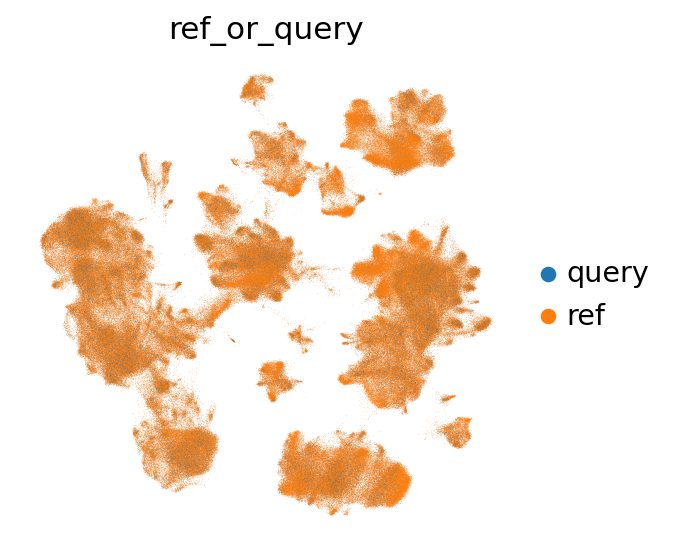

In [89]:
sc.pl.umap(
        combined_emb,
        color='ref_or_query',
        frameon=False,
        wspace=0.6
        )

#### UMAP Uncertainties

Here we show label transfer uncertainties per level. Regions with high uncertainty can highlight interesting cell types/states, not present in the reference. Note that uncertainties will get higher, the more detailed we go:

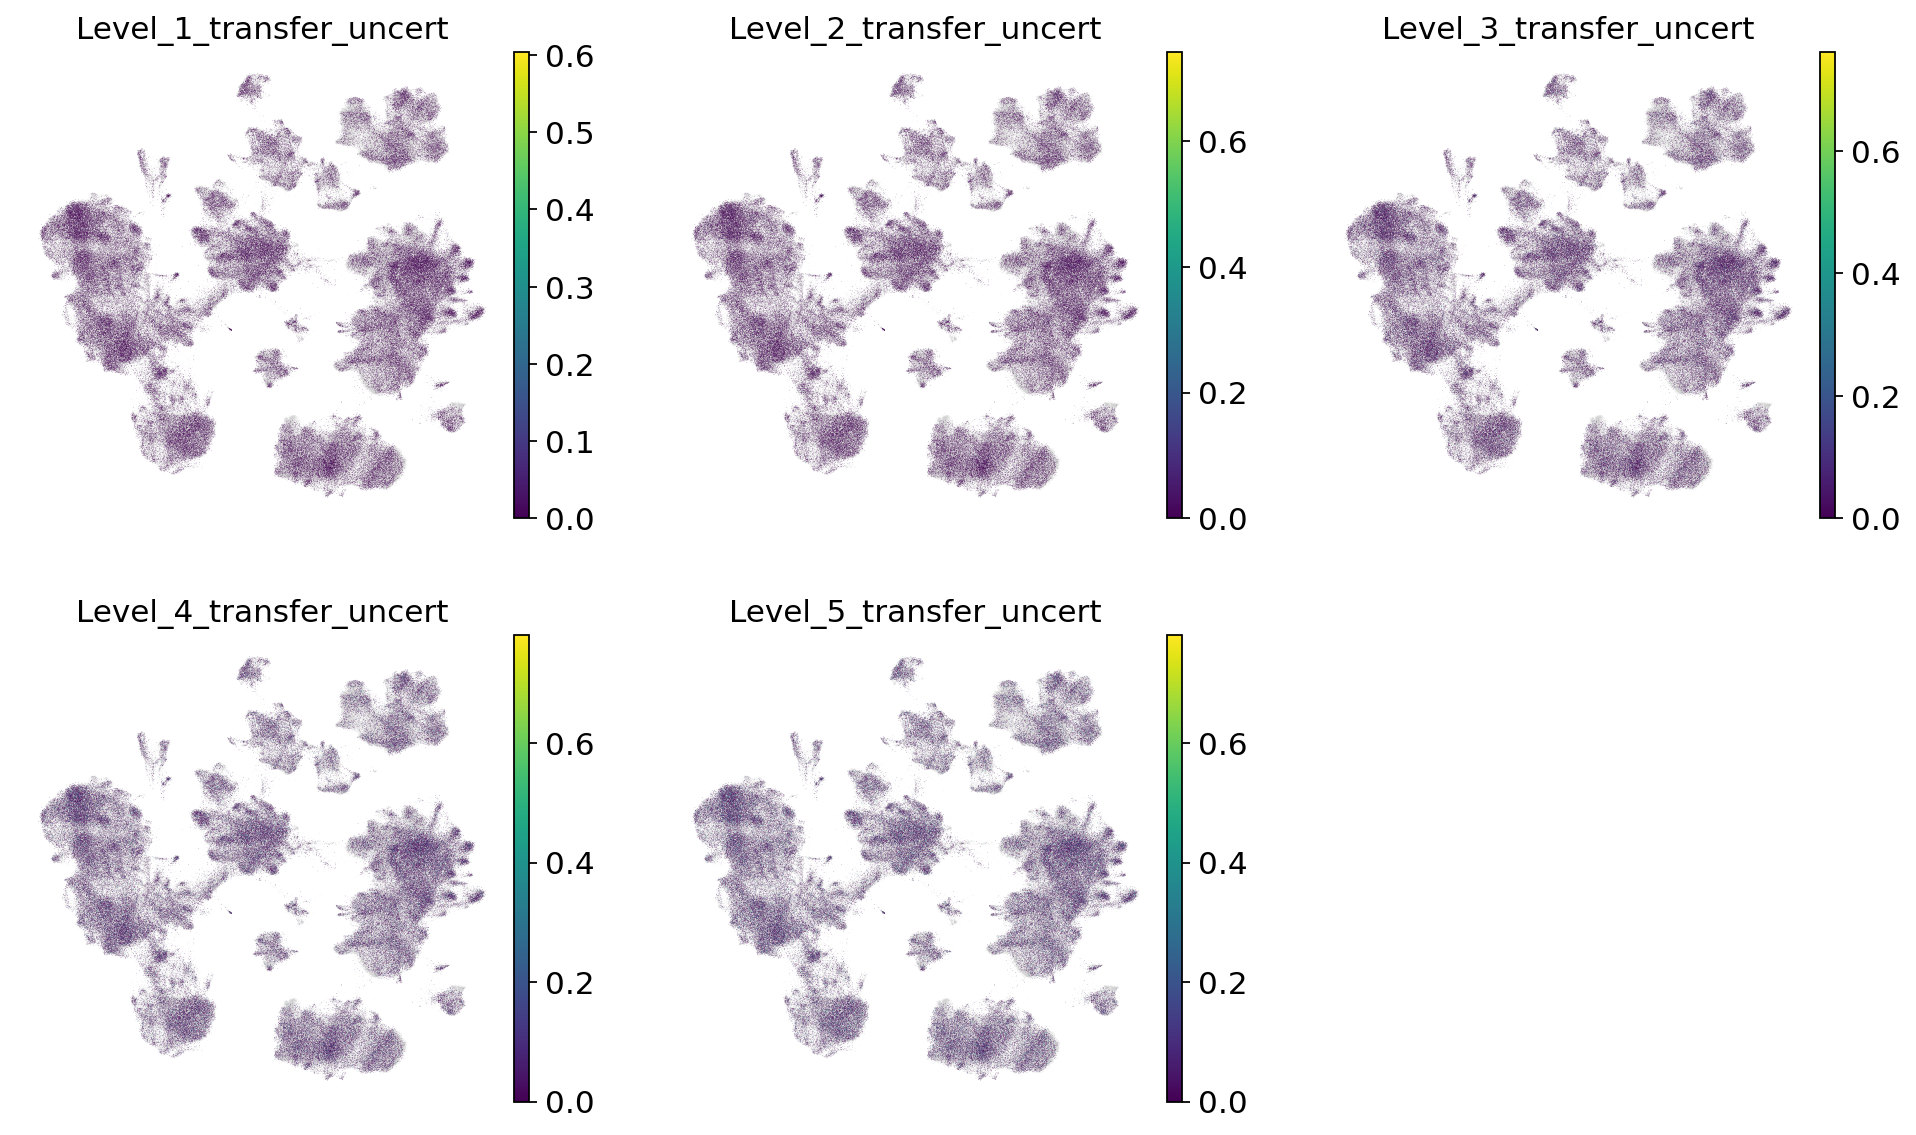

In [90]:
sc.pl.umap(
    combined_emb,
    color=[f'Level_{lev}_transfer_uncert' for lev in range(1,6)],
    ncols=3,
    frameon=False,
    )

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


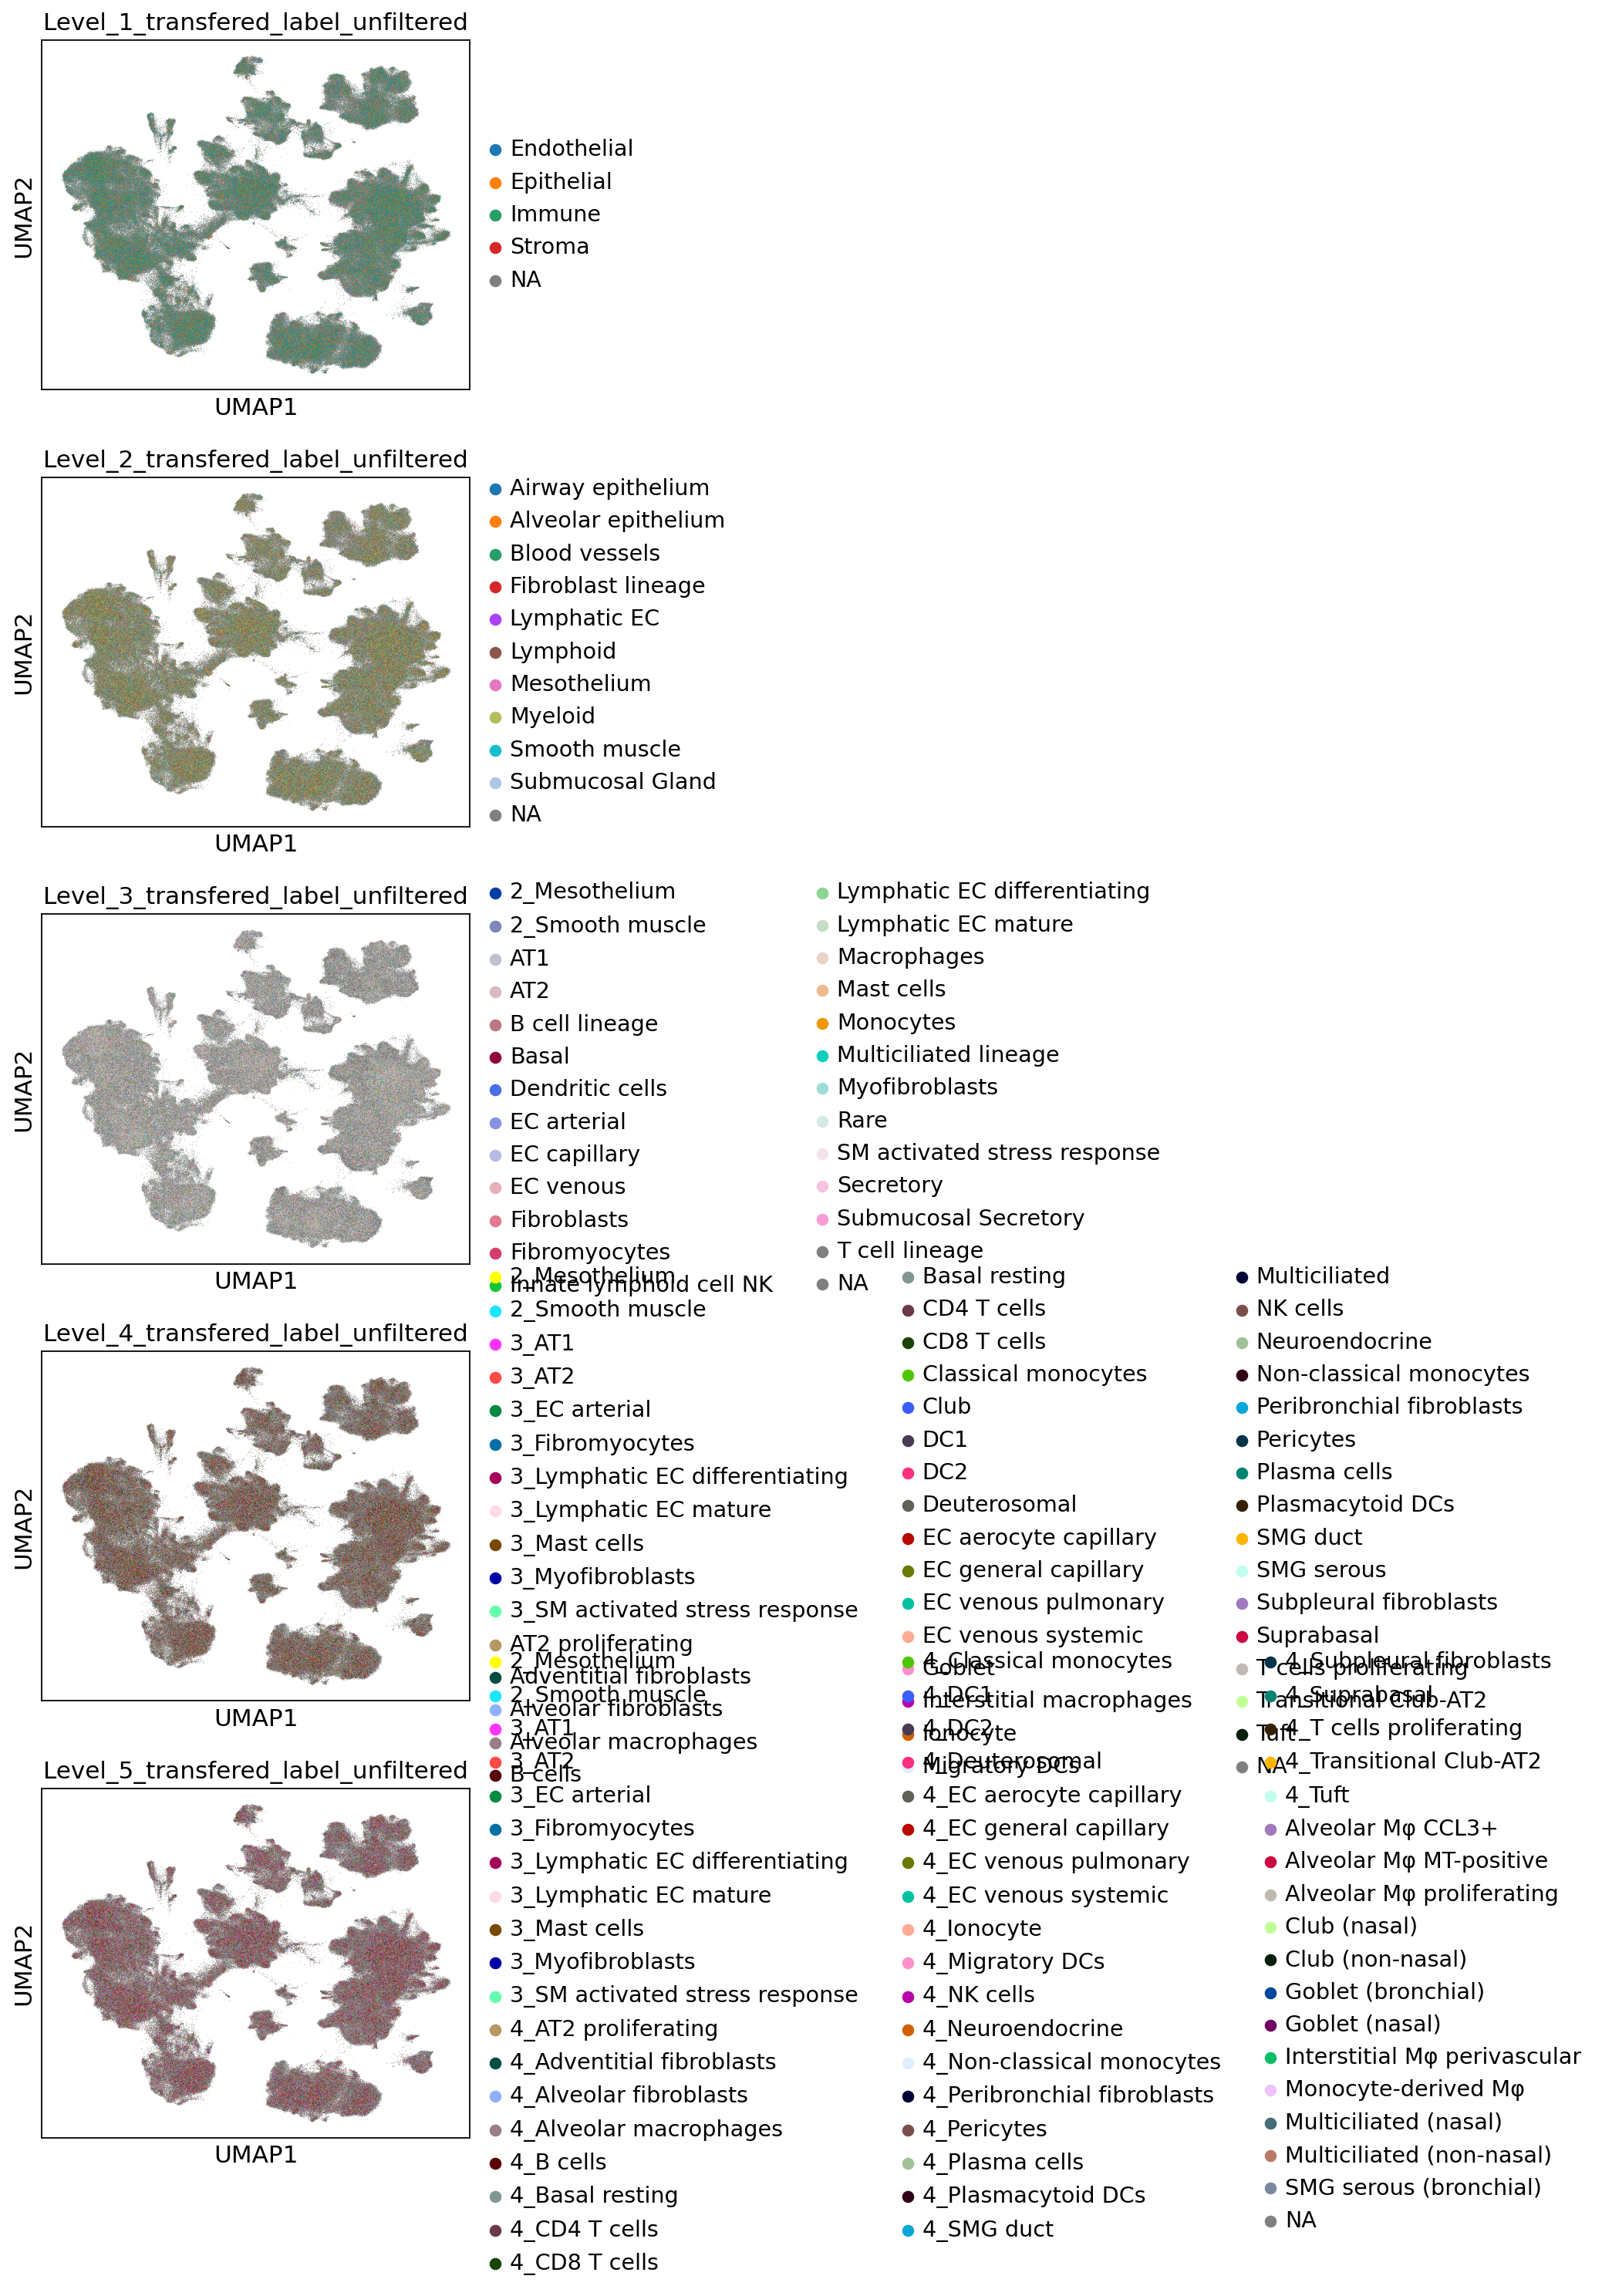

In [91]:
sc.pl.umap(
        combined_emb,
        color=[f"Level_{lev}_transfered_label_unfiltered" for lev in range(1,6)],
        na_color="grey",
        ncols=1,
        size=0.5
)

/usr/local/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


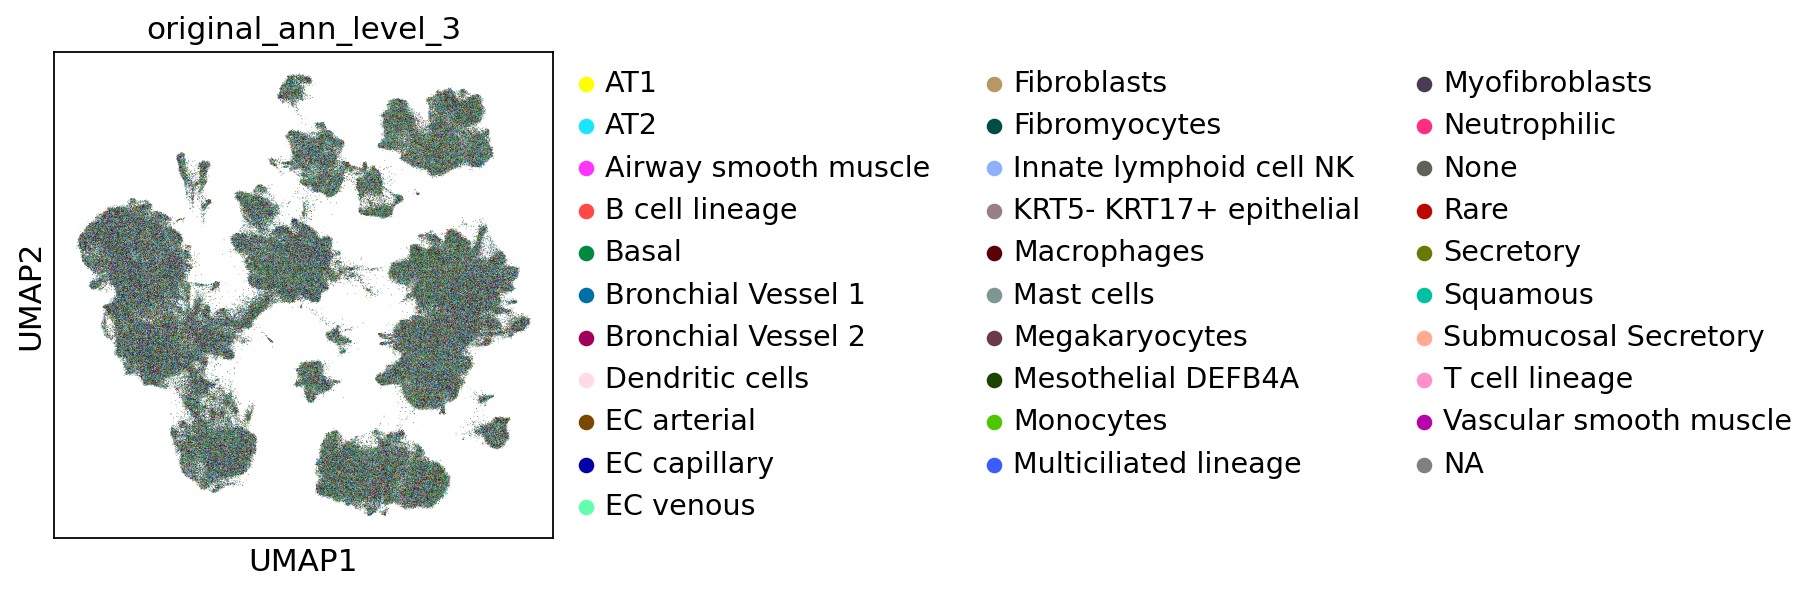

In [92]:
sc.pl.umap(
        combined_emb,
        color="original_ann_level_3",
        na_color="grey",
        ncols=1,
        size=0.5
)